In [450]:
import sys

for path in sys.path:
    print(path)
sys.path.append('/Users/adam/Documents/BIH/ERKER2Phenopackets/ERKER2Phenopackets')
# from ERKER2Phenopackets.src.utils.polars_utils import scatter_plot

# scatter_plot([1,2,3], [4,4,4,])

confidential_phenopackets_dir = '/Users/adam/Documents/BIH/ERKER2Phenopackets/ERKER2Phenopackets/ERKER2Phenopackets/data/confidential/phenopackets_mc4r'

C:\Users\Surface\AppData\Local\JetBrains\Toolbox\apps\DataSpell\ch-0\232.10072.29\plugins\python-ce\helpers-pro\jupyter_debug
C:\Users\Surface\AppData\Local\JetBrains\Toolbox\apps\DataSpell\ch-0\232.10072.29\plugins\python-ce\helpers\pydev
C:\Users\Surface\OneDrive\Documents\DataSpell\ERKER2Phenopackets\ERKER2Phenopackets\src\analysis\ml
C:\Users\Surface\OneDrive\Documents\DataSpell\ERKER2Phenopackets
C:\Users\Surface\anaconda3\envs\ERKER2Phenopackets\python310.zip
C:\Users\Surface\anaconda3\envs\ERKER2Phenopackets\DLLs
C:\Users\Surface\anaconda3\envs\ERKER2Phenopackets\lib
C:\Users\Surface\anaconda3\envs\ERKER2Phenopackets

C:\Users\Surface\anaconda3\envs\ERKER2Phenopackets\lib\site-packages
C:\Users\Surface\anaconda3\envs\ERKER2Phenopackets\lib\site-packages\win32
C:\Users\Surface\anaconda3\envs\ERKER2Phenopackets\lib\site-packages\win32\lib
C:\Users\Surface\anaconda3\envs\ERKER2Phenopackets\lib\site-packages\Pythonwin
/Users/adam/Documents/BIH/ERKER2Phenopackets/ERKER2Phenopackets
/

In [451]:
import configparser
from pathlib import Path

config = configparser.ConfigParser()
config.read('../../../data/config/config.cfg')

phenopackets_out_dir = ('..' / Path(config.get('Paths', 'phenopackets_out'))).resolve()

phenopackets_out_dir

WindowsPath('C:/Users/Surface/OneDrive/Documents/DataSpell/ERKER2Phenopackets/ERKER2Phenopackets/data/out/phenopackets')

# read in data from phenopackets

In [452]:
from ERKER2Phenopackets.src.utils.io import read_files

example_phenopackets_dir = phenopackets_out_dir / 'example-phenopackets-from-synthetic-data'
is_synth_data = True

if is_synth_data:
    pps = read_files(example_phenopackets_dir)
else:
    pps = read_files(confidential_phenopackets_dir)

# convert phenopackets to dataframe
Necessary fields:
- id
- zygosity
- cHGVS mutation
- Obsesity Class and timestamp

In [453]:
from typing import Tuple, Any
from phenopackets import Phenopacket

sex_map = {0: 'unknown', 1: 'female', 2: 'male', 3: 'other'}

def extract_phenotype(phenotypic_features, i) -> Tuple[str, str, bool, int]:
    phenotypic_features = phenotypic_features[i]
    obesity_class_hpo = phenotypic_features.type.id
    obesity_class = phenotypic_features.type.label
    excluded = phenotypic_features.excluded
    onset = phenotypic_features.onset.timestamp.ToSeconds()
    return obesity_class_hpo, obesity_class, excluded, onset

def extract_fields(phenopacket: Phenopacket):
    pp_id = int(phenopacket.id)
    dob = phenopacket.subject.date_of_birth.ToSeconds()
    sex = sex_map[phenopacket.subject.sex]

    try:
        variation_descriptor = phenopacket.interpretations[0].diagnosis.genomic_interpretations[0].variant_interpretation.variation_descriptor
        c_hgvs = variation_descriptor.expressions[1].value
        zygosity = variation_descriptor.allelic_state.label
    except IndexError:
        print(f'Genotype missing in phenopacket with it {pp_id}')
        return None

    phenotypic_features = phenopacket.phenotypic_features

    phenotype_data = []
    for i in range(5):
        try:
            obesity_class_hpo, obesity_class, excluded, onset = extract_phenotype(phenotypic_features, i)
        except IndexError:
            obesity_class_hpo, obesity_class, excluded, onset = None, None, None, None
        phenotype_data.extend([obesity_class_hpo, obesity_class, excluded, onset])

    return tuple([pp_id, dob, sex, zygosity, c_hgvs] + phenotype_data)


In [454]:
# todo: some people have multiple variants max 3

In [455]:
phenopacket = pps[0]
variation_descriptor = phenopacket.interpretations[0].diagnosis.genomic_interpretations[0].variant_interpretation

phenopacket

id: "0"
subject {
  id: "0"
  date_of_birth {
    seconds: 946684800
  }
  sex: FEMALE
  taxonomy {
    id: "NCBITaxon:9606"
    label: "Homo sapiens"
  }
}
phenotypic_features {
  type {
    id: "HP:0001513"
    label: "Obesity"
  }
  excluded: true
  onset {
    timestamp {
      seconds: 708652800
    }
  }
}
interpretations {
  id: "e0dd47b3-6e13-4507-84a7-5606bee17024"
  progress_status: SOLVED
  diagnosis {
    disease {
      id: "ORPHA:71529"
      label: "Obesity due to melanocortin 4 receptor deficiency"
    }
    genomic_interpretations {
      subject_or_biosample_id: "0"
      interpretation_status: CONTRIBUTORY
      variant_interpretation {
        variation_descriptor {
          id: "id:A"
          expressions {
            syntax: "hgvs"
            value: "NP_005903.2:p.(Val103Ile)"
          }
          expressions {
            syntax: "hgvs"
            value: "NM_005912.3:c.181G>T"
          }
          allelic_state {
            id: "GENO:0000135"
            

In [456]:
for pp in pps:
    print(extract_fields(pp))

(0, 946684800, 'female', 'heterozygous', 'NM_005912.3:c.181G>T', 'HP:0001513', 'Obesity', True, 708652800, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None, None)
(1, 915148800, 'female', 'heterozygous', 'NM_005912.3:c.307G>A', 'HP:0001513', 'Obesity', True, 1254268800, 'HP:0001513', 'Obesity', False, 967507200, None, None, None, None, None, None, None, None, None, None, None, None)
Genotype missing in phenopacket with it 10
None
Genotype missing in phenopacket with it 11
None
(12, 757382400, 'male', 'heterozygous', 'NM_005912.3:c.307G>A', 'HP:0001513', 'Obesity', False, 1118793600, 'HP:0025500', 'Class II obesity', False, 1267056000, None, None, None, None, None, None, None, None, None, None, None, None)
(13, 757382400, 'male', 'heterozygous', 'NM_005912.3:c.307G>A', 'HP:0001513', 'Obesity', True, 1234051200, 'HP:0001507', 'Growth abnormality', True, 985219200, 'HP:0001507', 'Growth abnormality', False, 876528000, None, None, None, None, None, N

In [457]:
import polars as pl

data = list(filter(lambda x: x is not None, map(extract_fields, pps)))

data, len(data)

Genotype missing in phenopacket with it 10
Genotype missing in phenopacket with it 11
Genotype missing in phenopacket with it 14
Genotype missing in phenopacket with it 15
Genotype missing in phenopacket with it 16
Genotype missing in phenopacket with it 19
Genotype missing in phenopacket with it 27
Genotype missing in phenopacket with it 34
Genotype missing in phenopacket with it 35
Genotype missing in phenopacket with it 40
Genotype missing in phenopacket with it 49
Genotype missing in phenopacket with it 5
Genotype missing in phenopacket with it 50
Genotype missing in phenopacket with it 6
Genotype missing in phenopacket with it 8


([(0,
   946684800,
   'female',
   'heterozygous',
   'NM_005912.3:c.181G>T',
   'HP:0001513',
   'Obesity',
   True,
   708652800,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None),
  (1,
   915148800,
   'female',
   'heterozygous',
   'NM_005912.3:c.307G>A',
   'HP:0001513',
   'Obesity',
   True,
   1254268800,
   'HP:0001513',
   'Obesity',
   False,
   967507200,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None),
  (12,
   757382400,
   'male',
   'heterozygous',
   'NM_005912.3:c.307G>A',
   'HP:0001513',
   'Obesity',
   False,
   1118793600,
   'HP:0025500',
   'Class II obesity',
   False,
   1267056000,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None,
   None),
  (13,
   757382400,
   'male',
   'heterozygous',
   'NM_005912.3:c.307G>A',
   'HP:0001513',
   'Obesity',
   True

In [458]:
columns = ['id', 'date_of_birth', 'sex', 'zygosity', 'c_hgvs', 'obesity_class_hpo0', 'obesity_class0', 'phenotype_refuted0', 'onset0', 'obesity_class_hpo1', 'obesity_class1', 'phenotype_refuted1', 'onset1', 'obesity_class_hpo2', 'obesity_class2', 'phenotype_refuted2', 'onset2', 'obesity_class_hpo3', 'obesity_class3', 'phenotype_refuted3', 'onset3', 'obesity_class_hpo4', 'obesity_class4', 'phenotype_refuted4', 'onset4']
transposed_data = list(zip(*data))

df = pl.DataFrame({col: transposed_data[i] for i, col in enumerate(columns)})

In [459]:
df.head(50)

id,date_of_birth,sex,zygosity,c_hgvs,obesity_class_hpo0,obesity_class0,phenotype_refuted0,onset0,obesity_class_hpo1,obesity_class1,phenotype_refuted1,onset1,obesity_class_hpo2,obesity_class2,phenotype_refuted2,onset2,obesity_class_hpo3,obesity_class3,phenotype_refuted3,onset3,obesity_class_hpo4,obesity_class4,phenotype_refuted4,onset4
i64,i64,str,str,str,str,str,bool,i64,str,str,bool,i64,str,str,bool,i64,str,str,bool,i64,str,str,bool,i64
0,946684800,"""female""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,708652800,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
1,915148800,"""female""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,1254268800,"""HP:0001513""","""Obesity""",false,967507200,null,null,null,null,null,null,null,null,null,null,null,null
12,757382400,"""male""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",false,1118793600,"""HP:0025500""","""Class II obesi…",false,1267056000,null,null,null,null,null,null,null,null,null,null,null,null
13,757382400,"""male""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,1234051200,"""HP:0001507""","""Growth abnorma…",true,985219200,"""HP:0001507""","""Growth abnorma…",false,876528000,null,null,null,null,null,null,null,null
17,1072915200,"""female""","""homozygous""","""NM_005912.3:c.…","""HP:0025500""","""Class II obesi…",true,638409600,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
18,1136073600,"""female""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,916272000,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null,null
2,1009843200,"""female""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,1087257600,"""HP:0001513""","""Obesity""",true,825811200,"""HP:0001507""","""Growth abnorma…",false,976406400,null,null,null,null,null,null,null,null
20,1072915200,"""male""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,872208000,"""HP:0025499""","""Class I obesit…",false,674524800,"""HP:0001507""","""Growth abnorma…",false,1037750400,null,null,null,null,null,null,null,null
21,1136073600,"""male""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,938563200,"""HP:0001513""","""Obesity""",true,1149724800,"""HP:0001507""","""Growth abnorma…",false,1451606400,null,null,null,null,null,null,null,null


# Data Cleaning

There is only one person with an unspecified zygosity, so we can drop this person.

In [460]:
df = df.filter(df['zygosity'] != 'unspecified zygosity')

In [461]:
# add new timestamps to make the data more realistic
if is_synth_data:
    from ERKER2Phenopackets.src.utils.dateutils import date_to_seconds, seconds_to_date, generate_random_date
    def random_onsets():
        seconds_per_day = 60 * 60 * 24
        dob = generate_random_date('1990-01-01', '2010-01-01')
        dob_seconds = date_to_seconds(dob)
        # dates:
        # 1. untersuchung bei geburt
        # 2. u6: 10 - 12 monate
        # 3. u7: 21 - 24 monate
        # 4. u8: 46 - 48 monate
        # 5. u9: 60 - 64 monate
        intervals = [
            (0, 35),
            (304, 365),
            (639, 730),
            (1399, 1460),
            (1825, 1947)
        ]
    
        onset_dates = [dob_seconds]
        for interval in intervals:
            min_days, max_days = interval
            min_date = seconds_to_date(dob_seconds + min_days * seconds_per_day)
            max_date = seconds_to_date(dob_seconds + max_days * seconds_per_day)
            onset_dates.append(date_to_seconds(generate_random_date(min_date, max_date)))
    
        return onset_dates
    
    dob, u1, u6, u7, u8, u9 = [], [], [], [], [], []
    
    for i in range(df.height):
        cur_dob, cur_u1, cur_u6, cur_u7, cur_u8, cur_u9 = random_onsets()
        dob.append(cur_dob)
        u1.append(cur_u1)
        u6.append(cur_u6)
        u7.append(cur_u7)
        u8.append(cur_u8)
        u9.append(cur_u9)
    
    df = df.with_columns(
        pl.Series(name='date_of_birth', values=dob),
        pl.Series(name='onset0', values=u1),
        pl.Series(name='onset1', values=u6),
        pl.Series(name='onset2', values=u7),
        pl.Series(name='onset3', values=u8),
        pl.Series(name='onset4', values=u9),
    )

In [462]:
df.head(50)

id,date_of_birth,sex,zygosity,c_hgvs,obesity_class_hpo0,obesity_class0,phenotype_refuted0,onset0,obesity_class_hpo1,obesity_class1,phenotype_refuted1,onset1,obesity_class_hpo2,obesity_class2,phenotype_refuted2,onset2,obesity_class_hpo3,obesity_class3,phenotype_refuted3,onset3,obesity_class_hpo4,obesity_class4,phenotype_refuted4,onset4
i64,f64,str,str,str,str,str,bool,f64,str,str,bool,f64,str,str,bool,f64,str,str,bool,f64,str,str,bool,f64
0,1.1566e9,"""female""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,1.1579e9,null,null,null,1.1830e9,null,null,null,1.2163e9,null,null,null,1.2811e9,null,null,null,1.3238e9
1,8.86896e8,"""female""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,8.875008e8,"""HP:0001513""","""Obesity""",false,9.137664e8,null,null,null,9.428832e8,null,null,null,1.0092e9,null,null,null,1.0540e9
12,7.346592e8,"""male""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",false,7.347456e8,"""HP:0025500""","""Class II obesi…",false,7.618752e8,null,null,null,7.942752e8,null,null,null,8.582976e8,null,null,null,8.937216e8
13,7.45632e8,"""male""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,7.47792e8,"""HP:0001507""","""Growth abnorma…",true,7.763904e8,"""HP:0001507""","""Growth abnorma…",false,8.0784e8,null,null,null,8.678016e8,null,null,null,9.135936e8
17,6.917184e8,"""female""","""homozygous""","""NM_005912.3:c.…","""HP:0025500""","""Class II obesi…",true,6.918048e8,null,null,null,7.232544e8,null,null,null,7.483968e8,null,null,null,8.166528e8,null,null,null,8.533728e8
18,8.22096e8,"""female""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,8.231328e8,null,null,null,8.526816e8,null,null,null,8.822304e8,null,null,null,9.438336e8,null,null,null,9.903168e8
2,7.11936e8,"""female""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,7.129728e8,"""HP:0001513""","""Obesity""",true,7.388928e8,"""HP:0001507""","""Growth abnorma…",false,7.733664e8,null,null,null,8.377344e8,null,null,null,8.76528e8
20,7.550496e8,"""male""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,7.565184e8,"""HP:0025499""","""Class I obesit…",false,7.8624e8,"""HP:0001507""","""Growth abnorma…",false,8.137152e8,null,null,null,8.800704e8,null,null,null,9.19296e8
21,6.909408e8,"""male""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,6.918048e8,"""HP:0001513""","""Obesity""",true,7.178976e8,"""HP:0001507""","""Growth abnorma…",false,7.509024e8,null,null,null,8.140608e8,null,null,null,8.517312e8


# Preprocessing

Order dataframe by descending number of same c_hgvs mutations

In [463]:
from ERKER2Phenopackets.src.utils.polars_utils import sort_by_method

def c_hgvs_occurences(df: pl.DataFrame) -> pl.DataFrame:
    return  df.join(other=df.groupby('c_hgvs').agg(pl.count('c_hgvs').alias('count')).select(['c_hgvs','count']), on='c_hgvs', how='inner').select(['count'])

df = sort_by_method(df, c_hgvs_occurences)

In [464]:
# correct value of refuted columns to match phenotype: only Obesity has refuted true these are our negatives
if is_synth_data:
    df = df.with_columns(
        phenotype_refuted0=df['obesity_class0'] == 'Obesity',
        phenotype_refuted1=df['obesity_class1'] == 'Obesity',
        phenotype_refuted2=df['obesity_class2'] == 'Obesity',
        phenotype_refuted3=df['obesity_class3'] == 'Obesity',
        phenotype_refuted4=df['obesity_class4'] == 'Obesity',
    )

In [465]:
from ERKER2Phenopackets.src.utils.polars_utils import replace_value

# growth abnormality: not recorded phenotype -> replace null
growth_abnormality = 'Growth abnormality'
growth_abnormality_hpo = 'HP:0001507'

for i in range(5):
    df = replace_value(df, f'obesity_class{i}', growth_abnormality, None)
    df = replace_value(df, f'obesity_class_hpo{i}', growth_abnormality_hpo, None)

In [466]:
from ERKER2Phenopackets.src.analysis.ml.analysis_helper_methods import create_label
from ERKER2Phenopackets.src.utils.polars_utils import map_col

# 0: Obesity refuted
# 1: Overweight
# 2: Class I Obesity (HPO)
# 3: Class II Obesity (HPO)
# 4: Class III Obesity (HPO)

for i in range(5):
    df = map_col(
        df, 
        map_from=[f'obesity_class_hpo{i}', f'obesity_class{i}', f'phenotype_refuted{i}'], 
        map_to=f'obesity_label{i}', 
        mapping=create_label
    )

In [467]:
# normalize timestamps
df = df.with_columns(
    onset0=df['onset0'] - df['date_of_birth'],
    onset1=df['onset1'] - df['date_of_birth'],
    onset2=df['onset2'] - df['date_of_birth'],
    onset3=df['onset3'] - df['date_of_birth'],
    onset4=df['onset4'] - df['date_of_birth'],
)

In [468]:
df.head(50)

id,date_of_birth,sex,zygosity,c_hgvs,obesity_class_hpo0,obesity_class0,phenotype_refuted0,onset0,obesity_class_hpo1,obesity_class1,phenotype_refuted1,onset1,obesity_class_hpo2,obesity_class2,phenotype_refuted2,onset2,obesity_class_hpo3,obesity_class3,phenotype_refuted3,onset3,obesity_class_hpo4,obesity_class4,phenotype_refuted4,onset4,obesity_label0,obesity_label1,obesity_label2,obesity_label3,obesity_label4
i64,f64,str,str,str,str,str,bool,f64,str,str,bool,f64,str,str,bool,f64,str,str,bool,f64,str,str,bool,f64,str,str,str,str,str
1,8.86896e8,"""female""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,604800.0,"""HP:0001513""","""Obesity""",true,2.68704e7,null,null,null,5.59872e7,null,null,null,1.22256e8,null,null,null,1.670976e8,"""Refuted Obesit…","""Refuted Obesit…","""Not recorded""","""Not recorded""","""Not recorded"""
12,7.346592e8,"""male""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,86400.0,"""HP:0025500""","""Class II obesi…",false,2.7216e7,null,null,null,5.9616e7,null,null,null,1.236384e8,null,null,null,1.590624e8,"""Refuted Obesit…","""Class II obesi…","""Not recorded""","""Not recorded""","""Not recorded"""
13,7.45632e8,"""male""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,2.16e6,null,null,false,3.07584e7,null,null,false,6.2208e7,null,null,null,1.221696e8,null,null,null,1.679616e8,"""Refuted Obesit…","""Not recorded""","""Not recorded""","""Not recorded""","""Not recorded"""
20,7.550496e8,"""male""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,1.4688e6,"""HP:0025499""","""Class I obesit…",false,3.11904e7,null,null,false,5.86656e7,null,null,null,1.250208e8,null,null,null,1.642464e8,"""Refuted Obesit…","""Class I obesit…","""Not recorded""","""Not recorded""","""Not recorded"""
23,9.98784e8,"""female""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,604800.0,"""HP:0001513""","""Obesity""",true,2.82528e7,null,null,false,5.9616e7,null,null,null,1.251936e8,null,null,null,1.673568e8,"""Refuted Obesit…","""Refuted Obesit…","""Not recorded""","""Not recorded""","""Not recorded"""
3,1.1169e9,"""male""","""heterozygous""","""NM_005912.3:c.…",null,null,null,1.9872e6,null,null,null,3.1536e7,null,null,null,6.14304e7,null,null,null,1.22688e8,null,null,null,1.666656e8,"""Not recorded""","""Not recorded""","""Not recorded""","""Not recorded""","""Not recorded"""
32,7.156512e8,"""male""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,864000.0,null,null,false,2.74752e7,null,null,null,5.84928e7,null,null,null,1.224288e8,null,null,null,1.586304e8,"""Refuted Obesit…","""Not recorded""","""Not recorded""","""Not recorded""","""Not recorded"""
37,9.268128e8,"""female""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,1.6416e6,"""HP:0025499""","""Class I obesit…",false,2.70432e7,"""HP:0001513""","""Obesity""",true,5.76288e7,null,null,null,1.210464e8,null,null,null,1.620864e8,"""Refuted Obesit…","""Class I obesit…","""Refuted Obesit…","""Not recorded""","""Not recorded"""
38,7.103808e8,"""female""","""heterozygous""","""NM_005912.3:c.…","""HP:0001513""","""Obesity""",true,2.0736e6,null,null,false,2.6784e7,null,null,null,5.65056e7,null,null,null,1.214784e8,null,null,null,1.58112e8,"""Refuted Obesit…","""Not recorded""","""Not recorded""","""Not recorded""","""Not recorded"""


Overweight, Class I-III Obesity: excluded false
if excluded (refuted) true -> BMI in normal range

only Obesity has refuted true these are our negatives

growth abnormality: not recorded phenotype -> drop rows

# Questions
## Descriptive Statistics
1. Distribution of zygosity? 
2. Distribution of sex?
3. Distribution of c_hgvs mutations?
4. c_hgvs distribution by zygosity?
5. Obesity Class Distribution?
6. Obesity Class Distribution by zygosity?
7. Obesity Class Distribution by c_hgvs mutation?
8. Obesity Class Distribution c_hgvs mutation and zygosity?
9. Obesity Class Distribution by sex?
10. How long does it take for a person to develop the different obesity classes based on their mutation?

## Predictive Statistics
1. What is the probability of a person with a certain c_hgvs mutation to develop a certain obesity class?
2. Prediction model of obesity class based on c_hgvs mutation and zygosity

In [469]:
import matplotlib.pyplot as plt
import numpy as np
from ERKER2Phenopackets.src.utils.polars_utils import barchart, barchart_3d, barchart_subplot, barchart_relative_distribution, barchart_relative_distribution_subplot, piechart_subplot, piechart

figsize = None

# Descriptive Statistics
# 1. Zygosity Distribution

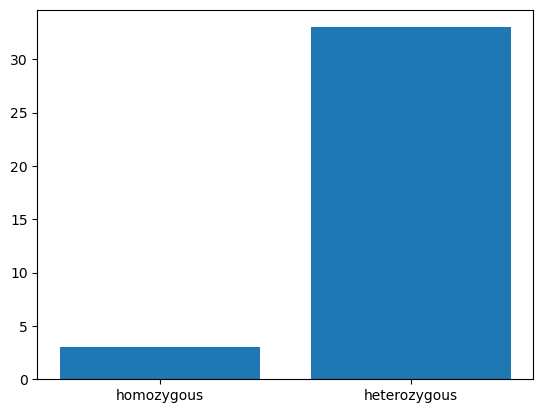

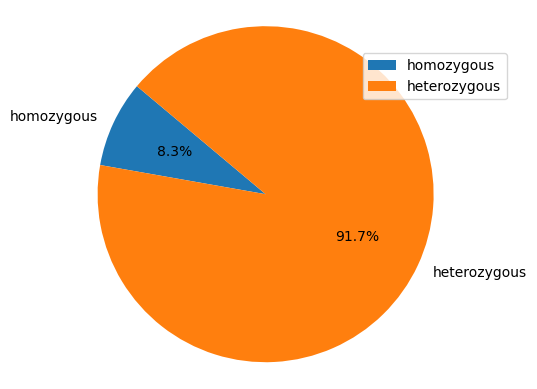

zygosity,count
str,u32
"""homozygous""",3
"""heterozygous""",33


In [470]:
grouped_by_zygosity = df.groupby('zygosity').count()
num_zygosity = grouped_by_zygosity.height

barchart(grouped_by_zygosity['zygosity'], grouped_by_zygosity['count'], figsize=figsize)
piechart(grouped_by_zygosity['zygosity'], grouped_by_zygosity['count'], figsize=figsize)

grouped_by_zygosity.head()

# 2. Sex Distribution

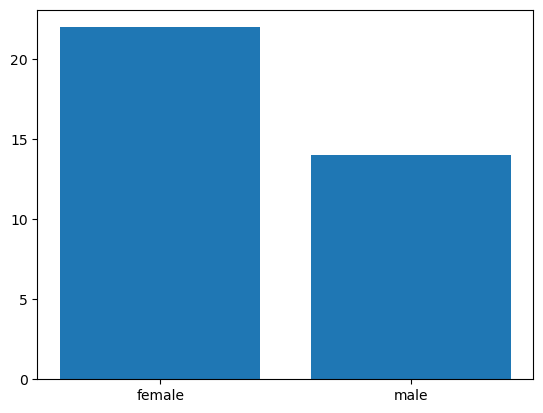

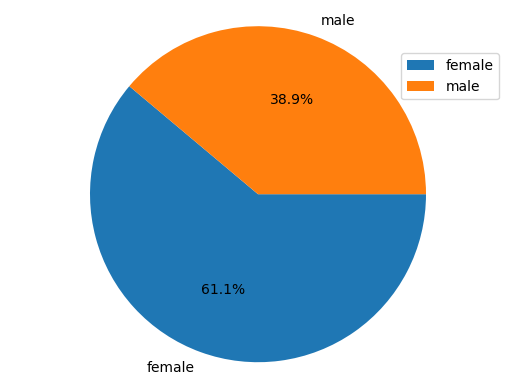

sex,count
str,u32
"""female""",22
"""male""",14


In [471]:
grouped_by_sex = df.groupby('sex').count()

barchart(grouped_by_sex['sex'], grouped_by_sex['count'], figsize=figsize)
piechart(grouped_by_sex['sex'], grouped_by_sex['count'], figsize=figsize)

grouped_by_sex.head()

# 3. c_hgvs variant distribution

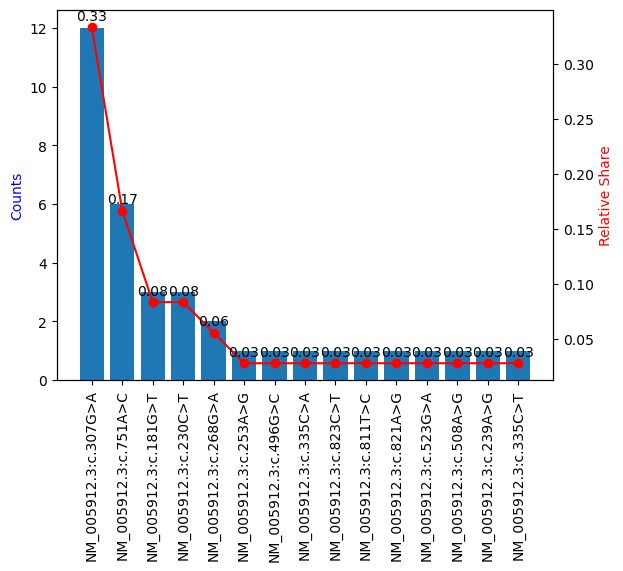

c_hgvs,count
str,u32
"""NM_005912.3:c.…",12
"""NM_005912.3:c.…",6
"""NM_005912.3:c.…",3
"""NM_005912.3:c.…",3
"""NM_005912.3:c.…",2
"""NM_005912.3:c.…",1
"""NM_005912.3:c.…",1
"""NM_005912.3:c.…",1
"""NM_005912.3:c.…",1


In [472]:
grouped_by_c_hgvs = df.groupby('c_hgvs').count().sort('count', descending=True)
num_c_hgvs = grouped_by_c_hgvs.height

# barchart(grouped_by_c_hgvs['c_hgvs'], grouped_by_c_hgvs['count'], figsize=figsize, x_tick_rotation='vertical')

barchart_relative_distribution(grouped_by_c_hgvs['c_hgvs'], grouped_by_c_hgvs['count'], figsize=figsize, x_tick_rotation='vertical')

grouped_by_c_hgvs.head(50)

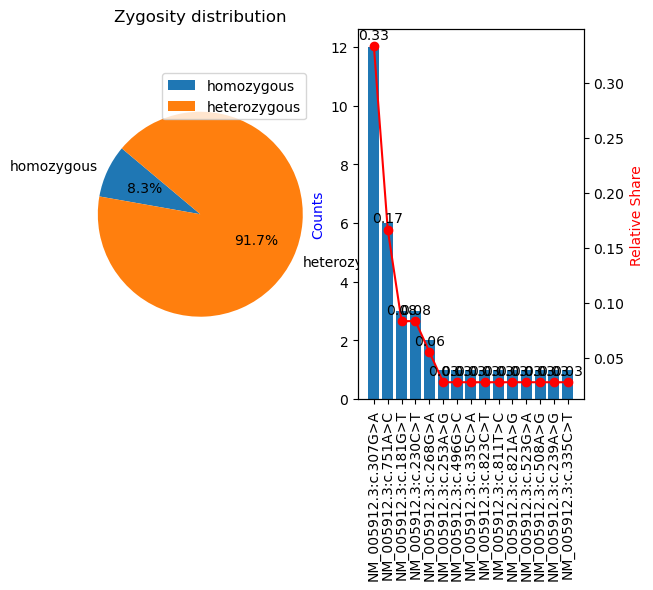

In [473]:
fig, (ax1, ax2) = plt.subplots(1, 2)
piechart_subplot(ax1, grouped_by_zygosity['zygosity'], grouped_by_zygosity['count'], 'Zygosity distribution',)
barchart_relative_distribution_subplot(ax2, grouped_by_c_hgvs['c_hgvs'], grouped_by_c_hgvs['count'], 'c_hgvs distribution', x_tick_rotation='vertical')
plt.show()

# 4. c_hgvs distribution by zygosity

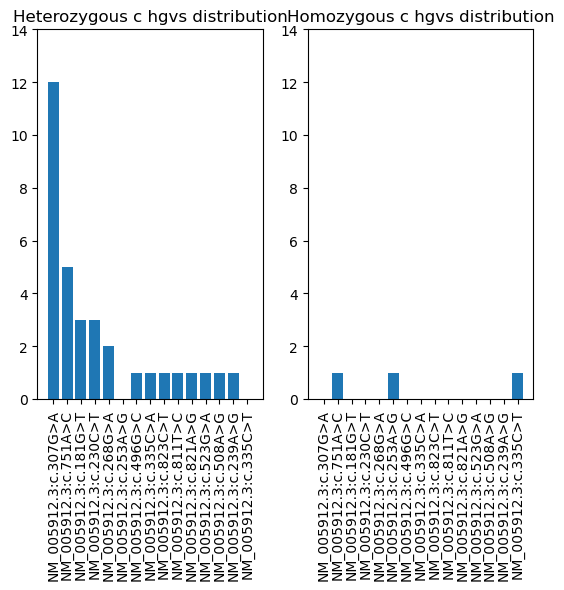

In [474]:
from ERKER2Phenopackets.src.utils.polars_utils import contingency_table

# barchart_3d(df, 'zygosity', 'c_hgvs', figsize=figsize, grouped_by_col1=grouped_by_zygosity, grouped_by_col2=grouped_by_c_hgvs) # not really useful

ct_zygosity_c_hgvs = contingency_table(df, 'zygosity', 'c_hgvs', grouped_by_zygosity['zygosity'], grouped_by_c_hgvs['c_hgvs'])
heterozygous_c_hgvs_frquency, homozygous_c_hgvs_frquency = ct_zygosity_c_hgvs[1], ct_zygosity_c_hgvs[0]
y_lim = int(np.max(ct_zygosity_c_hgvs) * 1.1) + 1

fig, (ax1, ax2) = plt.subplots(1, 2)
barchart_subplot(ax1, grouped_by_c_hgvs['c_hgvs'], heterozygous_c_hgvs_frquency, 'Heterozygous c hgvs distribution', x_tick_rotation='vertical', y_min=0, y_max=y_lim)
barchart_subplot(ax2, grouped_by_c_hgvs['c_hgvs'], homozygous_c_hgvs_frquency, 'Homozygous c hgvs distribution', x_tick_rotation='vertical', y_min=0, y_max=y_lim)
plt.show()

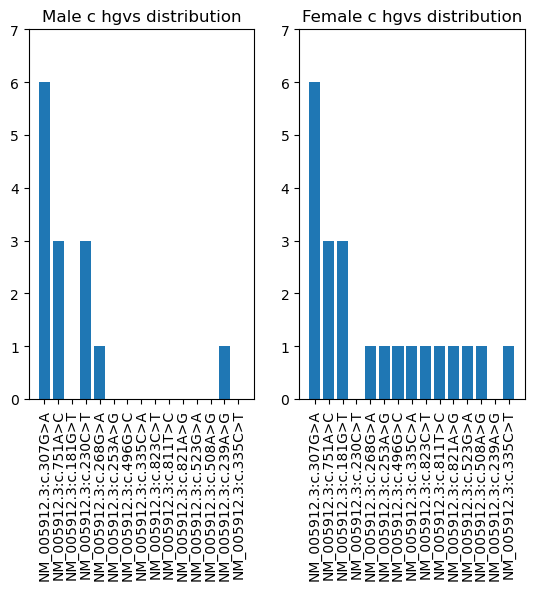

In [475]:
ct_sex_c_hgvs = contingency_table(df, 'sex', 'c_hgvs', ('male', 'female'), grouped_by_c_hgvs['c_hgvs'])
male_c_hgvs_frquency, female_c_hgvs_frquency = ct_sex_c_hgvs[0], ct_sex_c_hgvs[1]
y_lim = int(np.max(ct_sex_c_hgvs) * 1.1) + 1

fig, (ax1, ax2) = plt.subplots(1, 2)
barchart_subplot(ax1, grouped_by_c_hgvs['c_hgvs'], male_c_hgvs_frquency, 'Male c hgvs distribution', x_tick_rotation='vertical', y_min=0, y_max=y_lim)
barchart_subplot(ax2, grouped_by_c_hgvs['c_hgvs'], female_c_hgvs_frquency, 'Female c hgvs distribution', x_tick_rotation='vertical', y_min=0, y_max=y_lim)
plt.show()

# 4. Obesity Class Distribution

In [476]:
from ERKER2Phenopackets.src.utils.polars_utils import melt_groupby_count, sort_columns

# 4.1 count appearance of obesity classes/ hpo terms at each of the 3 inspections
obesity_class_count = melt_groupby_count(df, columns=[f'obesity_label{i}' for i in range(5)]).sort(by='value')

obesity_class_count = sort_columns(obesity_class_count, ['value'])

print(obesity_class_count.head(50))

shape: (6, 6)
┌────────────────┬────────────────┬────────────────┬───────────────┬───────────────┬───────────────┐
│ value          ┆ obesity_label0 ┆ obesity_label1 ┆ obesity_label ┆ obesity_label ┆ obesity_label │
│ ---            ┆ ---            ┆ ---            ┆ 2             ┆ 3             ┆ 4             │
│ str            ┆ u32            ┆ u32            ┆ ---           ┆ ---           ┆ ---           │
│                ┆                ┆                ┆ u32           ┆ u32           ┆ u32           │
╞════════════════╪════════════════╪════════════════╪═══════════════╪═══════════════╪═══════════════╡
│ Class I        ┆ 0              ┆ 4              ┆ 0             ┆ 1             ┆ 0             │
│ obesity        ┆                ┆                ┆               ┆               ┆               │
│ (HP:0025499)   ┆                ┆                ┆               ┆               ┆               │
│ Class II       ┆ 1              ┆ 1              ┆ 0             ┆ 0       

In [477]:
column_names = tuple(obesity_class_count['value'])
obesity_class_count_transpose = obesity_class_count.transpose(column_names=column_names)
if column_names != obesity_class_count_transpose.row(0):
    raise Exception('New column names do not match old row names')
obesity_class_count_transpose = obesity_class_count_transpose.tail(5).select(['Refuted Obesity (HP:0001513)', 'Overweight (HP:0025502)', 'Class I obesity (HP:0025499)', 'Class II obesity (HP:0025500)', 'Class III obesity (HP:0025501)'])
print(obesity_class_count_transpose.head(50))

shape: (5, 5)
┌─────────────────┬──────────────┬─────────────────┬──────────────────┬───────────────────┐
│ Refuted Obesity ┆ Overweight   ┆ Class I obesity ┆ Class II obesity ┆ Class III obesity │
│ (HP:0001513)    ┆ (HP:0025502) ┆ (HP:0025499)    ┆ (HP:0025500)     ┆ (HP:0025501)      │
│ ---             ┆ ---          ┆ ---             ┆ ---              ┆ ---               │
│ str             ┆ str          ┆ str             ┆ str              ┆ str               │
╞═════════════════╪══════════════╪═════════════════╪══════════════════╪═══════════════════╡
│ 28              ┆ 0            ┆ 0               ┆ 1                ┆ 0                 │
│ 6               ┆ 2            ┆ 4               ┆ 1                ┆ 0                 │
│ 3               ┆ 1            ┆ 0               ┆ 0                ┆ 0                 │
│ 1               ┆ 0            ┆ 1               ┆ 0                ┆ 0                 │
│ 0               ┆ 0            ┆ 0               ┆ 0            

In [478]:
def cast(column):
    return column.cast(pl.Int32).to_list()

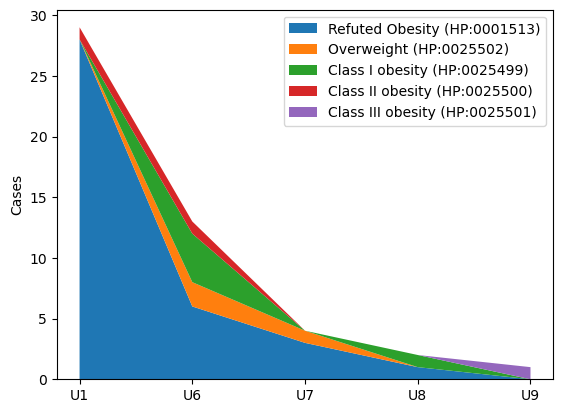

In [479]:
categories = obesity_class_count_transpose.columns

time_stamps = ['U1', 'U6', 'U7', 'U8', 'U9']


values = [cast(obesity_class_count_transpose[cat]) for cat in categories]

plt.figure(figsize=figsize)

plt.stackplot(range(5), values[0], values[1], values[2], values[3], values[4], labels=categories)
plt.xticks(range(5), time_stamps)
plt.ylabel('Cases')
plt.legend()
plt.show()

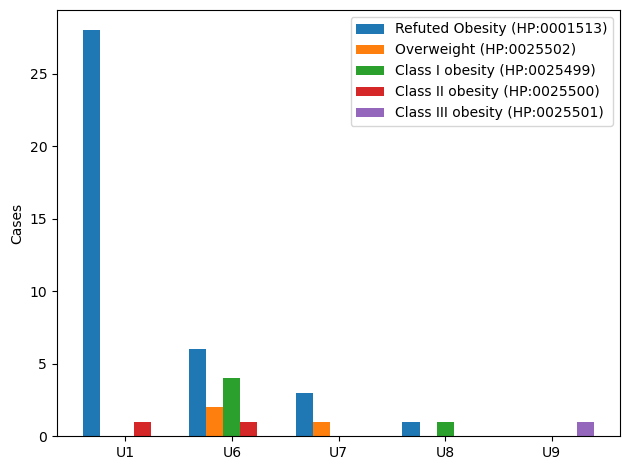

In [480]:
from ERKER2Phenopackets.src.utils.polars_utils import barchart_multiple

barchart_multiple(time_stamps, values, 'Cases', categories)

# 4.1 Phenotype Transition Graphs
1. Markov chain style

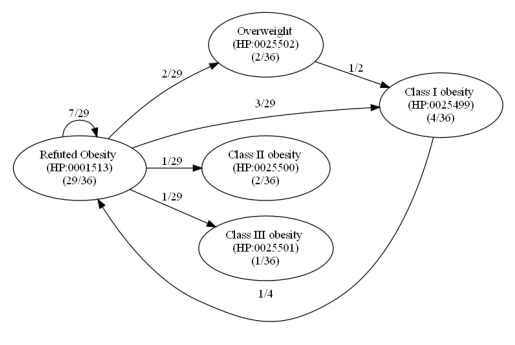

In [481]:
from ERKER2Phenopackets.src.analysis.ml.analysis_helper_methods import plot_phenotype_transition_graph

file_path = 'markov_chain_obesity_classes.png'
phenotype_labels = ['Refuted Obesity \n(HP:0001513)', 'Overweight \n(HP:0025502)', 'Class I obesity \n(HP:0025499)', 'Class II obesity \n(HP:0025500)', 'Class III obesity \n(HP:0025501)']

initial_counts_df = (melt_groupby_count(df, columns=
[f'obesity_label{i}' for i in range(5)])
                     .select(['value', 'obesity_label0'])
                     )
initial_counts_dict = {
    row['value']: row['obesity_label0']
    for row in initial_counts_df.to_struct('test')
}
initial_counts = (
        [initial_counts_dict[pheno_label]
         for pheno_label in categories]
        + [initial_counts_dict['Not recorded']]
)

plot_phenotype_transition_graph(df, 'obesity_label', phenotype_labels.copy(), initial_counts=initial_counts, count_not_recorded=True, percentages=False, file_path=file_path)

2. Patient Journey

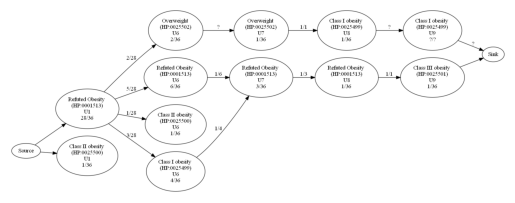

In [482]:
from ERKER2Phenopackets.src.analysis.ml.analysis_helper_methods import index_similar
from ERKER2Phenopackets.src.utils.graphutils import graphplot
import networkx as nx

# def connect_rows(num_rows, num_nodes_per_row):
#     for row in range(1, num_rows):
#         for node_in_first_row in range(1, num_nodes_per_row + 1):
#             for node_in_next_row in range(1, num_nodes_per_row + 1):
#                 current_node_index = (row - 1) * num_nodes_per_row + node_in_first_row
#                 next_node_index = row * num_nodes_per_row + node_in_next_row
#                 yield current_node_index, next_node_index

file_path = 'time_split_graph_obesity_classes.png'
num_phenotype_labels = len(phenotype_labels)
num_phenotype_measurements = 5
source = 0
sink = len(categories)*5+1
not_recorded = -1

G = nx.DiGraph()
G.add_node(source, label='Source')
G.add_node(sink, label='Sink')
G.add_node(not_recorded, label='Not recorded')

node = 1
empty_nodes = []
# transition_counts = {i: [] for i in range(sink)}
for i in range(num_phenotype_measurements):
    target_addend = 1 + (i + 1) * num_phenotype_labels
    
    for label in phenotype_labels:
        row, col = i, (node - 1) % num_phenotype_labels
        count = int(obesity_class_count_transpose.item(row, col))
        if count == 0:
            empty_nodes.append(node)
        else:
            G.add_node(node, label=f'{label}\n{time_stamps[i]}\n{count}/{df.height}')
            
            if i < num_phenotype_measurements - 1:
                label_wo_newlines = categories[index_similar(categories, label)]
                # target nodes and how many patients transition to these targets
                outgoing = df.filter(df[f'obesity_label{i}'] == label_wo_newlines).select([f'obesity_label{i + 1}']).groupby(by=[f'obesity_label{i + 1}']).count()
                
                
                for target_label, count_transitioning_to_target in outgoing.rows():
                    target = not_recorded
                    try:
                        target = categories.index(target_label)
                    except ValueError:
                        pass
                    else: # if label in row
                        target += target_addend
                        
                    # add the edge
                    if G.has_edge(node, target):
                        G.edges[node, target]['denominator'] += count
                        G.edges[node, target]['numerator'] += count_transitioning_to_target
                    else:
                        G.add_edge(node, target, denominator=count, numerator=count_transitioning_to_target)   
                
        node += 1

# connect first row to source
for i in range(1, num_phenotype_labels + 1):
    if not i in empty_nodes:
        G.add_edge(source, i)

for edge in G.edges(data=True):
    from_, to, data = edge
    if data:
        G.edges[from_, to]['label'] = f'{data["numerator"]}/{data["denominator"]}'

# connect last row to sink 
for i in range(len(categories)*4+1, len(categories)*5+1):
    if not i in empty_nodes:
        G.add_edge(i, sink)
G.remove_node(not_recorded)

ccs = list(nx.connected_components(G.to_undirected()))
# determine largest connected component (this is the main graph) and remove it
max_component_id, max_component_length = max(
    ((i, len(component)) for i, component in enumerate(ccs)),
    key=lambda x: x[1],
    default=(-1, 0)
)
ccs = [component for i, component in enumerate(ccs) if i != max_component_id]

for cc in ccs: # assume each cc could have multiple nodes in multiple layers
    cc = list(cc)
    # separate the sinks and sources of the cc into layers 
    sources, sinks = [node for node in cc if G.in_degree(node) == 0], [node for node in cc if G.out_degree(node) == 0]
    layers = {i: [node for node in cc if i * num_phenotype_labels <= node < (i + 1) * num_phenotype_labels] for i in range(num_phenotype_measurements)}

    # 1. 
    while len(sources) > 0:
        for node in sources:
            previous = node - num_phenotype_labels
            if previous < source:
                previous = source

            if not G.has_node(previous):
                G.add_node(previous, label=f'{phenotype_labels[(previous - 1) % num_phenotype_labels]}\n{time_stamps[(previous - 1) // num_phenotype_labels]}\n?/?') # todo

            if not G.has_edge(previous, node):
                G.add_edge(previous, node, label="?") # todo

            if previous != source:
                cc.append(previous)

        sources = [node for node in cc if G.in_degree(node) == 0]


    # 2. find the last layer, go forwards until you hit source and add the connections
    while len(sinks) > 0:
        # 1. 
        for node in sinks:
            next_ = node + num_phenotype_labels
            if next_ > sink:
                next_ = sink

            if not G.has_node(next_):
                G.add_node(next_, label=f'{phenotype_labels[(next_ - 1) % num_phenotype_labels]}\n{time_stamps[(next_ - 1) // num_phenotype_labels]}\n?/?') # todo

            if not G.has_edge(node, next_):
                G.add_edge(node, next_, label="?") # todo

            if next_ != sink:
                cc.append(next_)

        sinks = [node for node in cc if G.out_degree(node) == 0]

    # todo: add counts to the edges and nodes that were filled in

graphplot(G, file_path=file_path, orientation="LR")

# 4.2 Table Obesity Class distribution in general and how long it takes to develop each class on average

In [483]:
from typing import List, Union
import polars as pl

def time_to_phenotype(df, phenotype_col_prefix, timestamp_col_prefix, time_unit_df: str, time_unit_output: str, by_col_labels: Union[str,List[str]] = None):
    """
    
    Expects a polars dataframe in ERKER format, with 5 label columns and 5 timestamp columns. For each patient, it notes when the patient was first diagnosed with a label and then calculates the average time it took for the patient to be diagnosed with the label. This data is then averaged in a new dataframe to show the average time it takes for a patient to be diagnosed with a label. 
    :param df: 
    :param phenotype_col_prefix: 
    :param timestamp_col_prefix:
    :param by_col_labels: columns to stratify by
    :return: 
    """
    if by_col_labels and isinstance(by_col_labels, str): # wrap in list
        by_col_labels = [by_col_labels]
        
    label_cols = [col for col in df.columns if col.startswith(phenotype_col_prefix)]
    timestamp_cols = [col for col in df.columns if col.startswith(timestamp_col_prefix)]

    new_data = {'id': [], 'phenotype': [], 'timestamp': []}
    
    if by_col_labels:
        for by_col_label in by_col_labels:
            new_data[by_col_label] = []
        for id_, by_cols, labels, timestamps in zip(df['id'], zip(*[df[by_col_label] for by_col_label in by_col_labels]), zip(*[df[col] for col in label_cols]), zip(*[df[col] for col in timestamp_cols])):
            seen_labels = set()
            for label, timestamp in zip(labels, timestamps):
                if label not in seen_labels:
                    new_data['id'].append(id_)
                    for i, by_col_label in enumerate(by_col_labels):
                        new_data[by_col_label].append(by_cols[i])
                    new_data['phenotype'].append(label)
                    new_data['timestamp'].append(timestamp)
                    seen_labels.add(label)
        groupby = by_col_labels + ['phenotype']
    else:
        for id_, labels, timestamps in zip(df['id'], zip(*[df[col] for col in label_cols]),
                                           zip(*[df[col] for col in timestamp_cols])):
            seen_labels = set()
            for label, timestamp in zip(labels, timestamps):
                if label not in seen_labels:
                    new_data['id'].append(id_)
                    new_data['phenotype'].append(label)
                    new_data['timestamp'].append(timestamp)
                    seen_labels.add(label)
        groupby = ['phenotype']

    result =  pl.DataFrame(new_data).groupby(groupby).agg(
        pl.mean('timestamp').alias('avg_timestamp'),
        pl.std('timestamp').alias('std_timestamp'),
        pl.count('timestamp').alias('count')
    )
    
    # change time units
    unit_switch = {
        'seconds': 1,
        'minutes': 60,
        'hours': 60 * 60,
        'days': 60 * 60 * 24,
        'months': 60 * 60 * 24 * 30,
        'years': 60 * 60 * 24 * 365
    }
    change_unit = unit_switch[time_unit_df] / unit_switch[time_unit_output]
    result = result.with_columns(
        (pl.col('avg_timestamp') * change_unit).apply(lambda x: round(x, 2)).alias('avg_timestamp_' + time_unit_output),
        (pl.col('std_timestamp') * change_unit).apply(lambda x: round(x, 2)).alias('std_timestamp_' + time_unit_output),
    ).drop('avg_timestamp', 'std_timestamp').sort(by='avg_timestamp_' + time_unit_output)
    
    # add total count and percentage
    total_counts = result.groupby(by_col_labels).agg(pl.sum('count').alias('total_count'))
    result = result.join(total_counts, on=by_col_labels, how='left').select(
        [col for col in result.columns if col != 'count' and col != 'total_count'] + ['count', 'total_count']
    )
    
    result = result.with_columns((pl.col('count') / pl.col('total_count')).alias('frequency'))
    
    return result
output_unit = 'months'
avg_time_phenotype = time_to_phenotype(df, 'obesity_label', 'onset', time_unit_df='seconds', time_unit_output=output_unit, by_col_labels=['c_hgvs', 'zygosity'])
avg_time_phenotype = avg_time_phenotype.filter(pl.col('phenotype') != 'Not recorded').sort(by='avg_timestamp_' + output_unit)

# todo: p values for difference in avg time to phenotype between categories

In [484]:
avg_time_phenotype

c_hgvs,zygosity,phenotype,avg_timestamp_months,std_timestamp_months,count,total_count,frequency
str,str,str,f64,f64,u32,u32,f64
"""NM_005912.3:c.…","""homozygous""","""Class II obesi…",0.03,0.0,1,2,0.5
"""NM_005912.3:c.…","""heterozygous""","""Refuted Obesit…",0.13,0.0,1,3,0.333333
"""NM_005912.3:c.…","""heterozygous""","""Refuted Obesit…",0.23,0.0,1,3,0.333333
"""NM_005912.3:c.…","""heterozygous""","""Refuted Obesit…",0.28,0.35,2,5,0.4
"""NM_005912.3:c.…","""heterozygous""","""Refuted Obesit…",0.37,0.0,1,4,0.25
"""NM_005912.3:c.…","""heterozygous""","""Refuted Obesit…",0.38,0.31,2,7,0.285714
"""NM_005912.3:c.…","""heterozygous""","""Refuted Obesit…",0.4,0.0,1,2,0.5
"""NM_005912.3:c.…","""heterozygous""","""Refuted Obesit…",0.4,0.0,1,2,0.5
"""NM_005912.3:c.…","""homozygous""","""Refuted Obesit…",0.43,0.0,1,2,0.5


C:\Users\Surface\OneDrive\Documents\DataSpell\ERKER2Phenopackets\ERKER2Phenopackets\src\utils\polars_utils.py:741: UserWarning: *c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.
  ax.scatter(x[mask], y[mask], c=cmap(i), marker=marker,


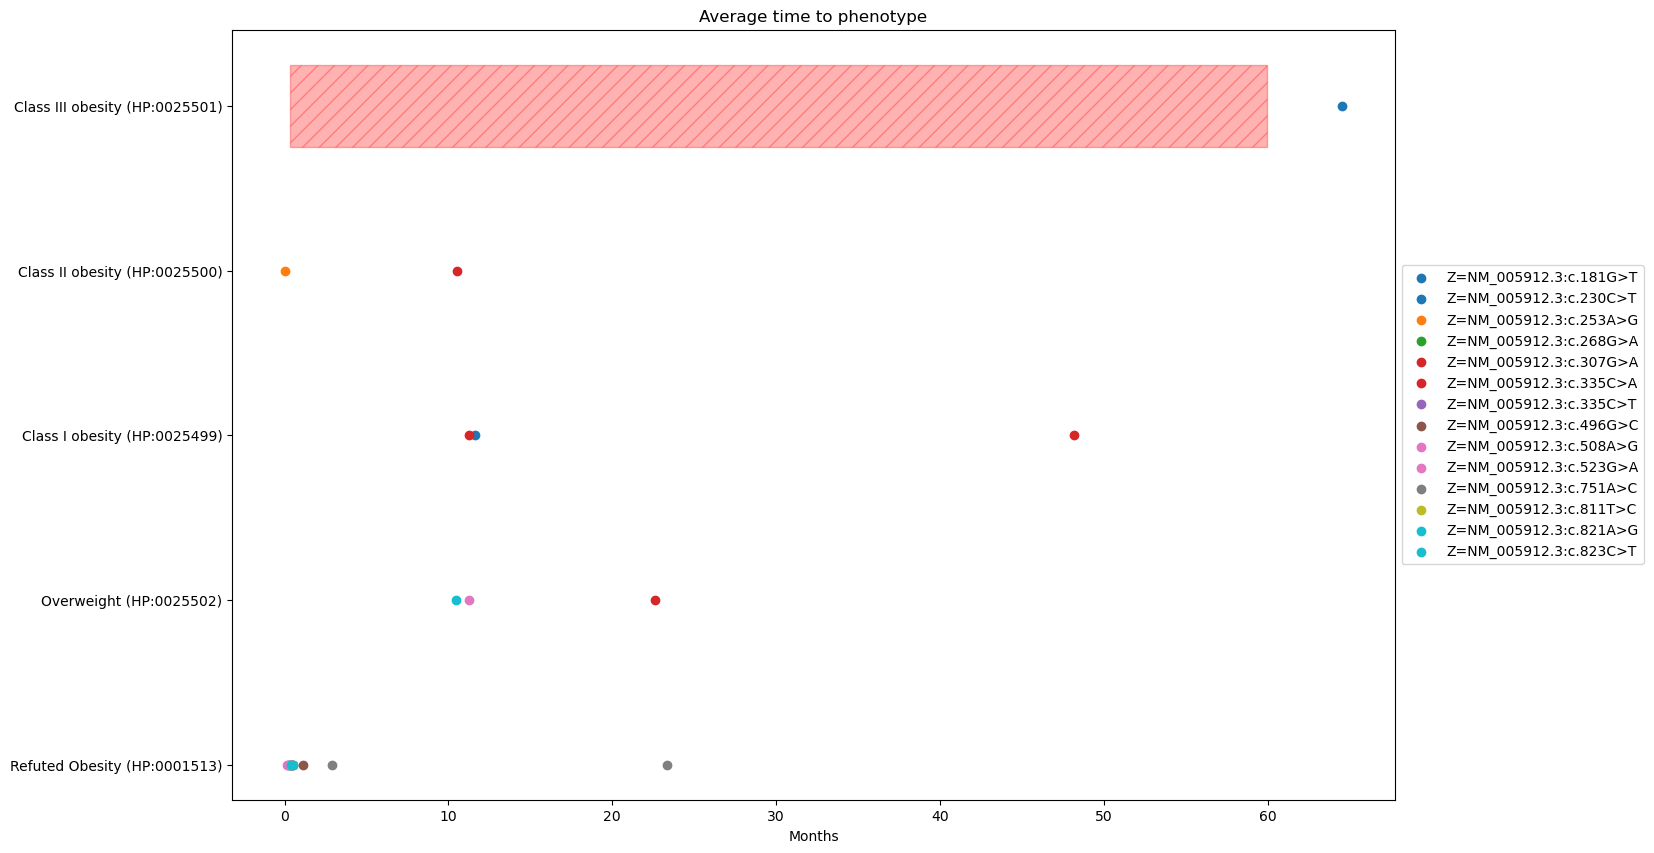

In [485]:
from ERKER2Phenopackets.src.utils.polars_utils import scatter_plot, scatter_subplot
# todo: maybe change this to include ranges (std) and not just the mean
avg_time_phenotype = avg_time_phenotype.sort(by='phenotype', descending=False)
x = avg_time_phenotype['avg_timestamp_months']
y_labels = ["Refuted Obesity (HP:0001513)", "Overweight (HP:0025502)", "Class I obesity (HP:0025499)", "Class II obesity (HP:0025500)", "Class III obesity (HP:0025501)"]
phenotyp_to_number = {phenotype: i for i, phenotype in enumerate(y_labels)}
y = np.array([phenotyp_to_number[phenotype] for phenotype in avg_time_phenotype['phenotype']])
z = avg_time_phenotype['c_hgvs']

fig, ax = plt.subplots(1, 1, figsize=(15,10))
ax.axhspan(ymin=3.75, ymax=4.25, xmin=0.05, xmax=0.89, color='red', alpha=0.3, hatch='//')
scatter_subplot(ax, x, y, z, title='Average time to phenotype', z_discrete=True, y_labels=y_labels, x_label='Months')
plt.show()

# Which combinations lead to the development of Class III obesity (HP:0025501) before 5 years of age (60 months)?

In [486]:
before_5 = avg_time_phenotype.filter((pl.col('phenotype') == "Class III obesity (HP:0025501)") & (pl.col('avg_timestamp_months') < 59))
if before_5.is_empty():
    print('No combinations lead to the development of Class III obesity (HP:0025501) before 5 years of age (60 months)')
else:
    before_5

No combinations lead to the development of Class III obesity (HP:0025501) before 5 years of age (60 months)


# Which combinations lead to a high risk of developing Class III obesity (HP:0025501)?

In [487]:
risk_factor = 0.1
high_risk = avg_time_phenotype.filter((pl.col('phenotype') == "Class III obesity (HP:0025501)") & (pl.col('frequency') > risk_factor))
if high_risk.is_empty():
    print('No combinations lead to a high risk of developing Class III obesity (HP:0025501)')
else:
    print(high_risk)

shape: (1, 8)
┌─────────────┬────────────┬────────────┬────────────┬────────────┬───────┬────────────┬───────────┐
│ c_hgvs      ┆ zygosity   ┆ phenotype  ┆ avg_timest ┆ std_timest ┆ count ┆ total_coun ┆ frequency │
│ ---         ┆ ---        ┆ ---        ┆ amp_months ┆ amp_months ┆ ---   ┆ t          ┆ ---       │
│ str         ┆ str        ┆ str        ┆ ---        ┆ ---        ┆ u32   ┆ ---        ┆ f64       │
│             ┆            ┆            ┆ f64        ┆ f64        ┆       ┆ u32        ┆           │
╞═════════════╪════════════╪════════════╪════════════╪════════════╪═══════╪════════════╪═══════════╡
│ NM_005912.3 ┆ heterozygo ┆ Class III  ┆ 64.53      ┆ 0.0        ┆ 1     ┆ 5          ┆ 0.2       │
│ :c.181G>T   ┆ us         ┆ obesity    ┆            ┆            ┆       ┆            ┆           │
│             ┆            ┆ (HP:002550 ┆            ┆            ┆       ┆            ┆           │
│             ┆            ┆ 1)         ┆            ┆            ┆       ┆  

In [488]:
# todo: std is null for real data for some reason and some patients are counte double in the count column

# Classification

## prepare dataset for classification
- select columns
- filter values: must have a value in obesity label0 and 1
- map categorical variables to integers since sklearn does not work with strings
- normalize timestamps into [0,1]
- split into train and test set
- convert to numpy arrays and reshape y into a row vector

In [489]:
data = df.select(['sex', 'zygosity', 'c_hgvs', 'obesity_label0', 'obesity_label1', 'obesity_label2', 'obesity_label3', 'obesity_label4', 'onset0', 'onset1', 'onset2', 'onset3', 'onset4'])
print(f'There are {data.height} patients in the dataset')

There are 36 patients in the dataset


In [490]:
X = data.select(['sex', 'zygosity', 'c_hgvs', 'obesity_label0', 'onset0', 'obesity_label1'])
X = X.filter((X['obesity_label0'] != 'Not recorded'))
X = X.filter((X['obesity_label1'] != 'Not recorded'))

X

sex,zygosity,c_hgvs,obesity_label0,onset0,obesity_label1
str,str,str,str,f64,str
"""female""","""heterozygous""","""NM_005912.3:c.…","""Refuted Obesit…",604800.0,"""Refuted Obesit…"
"""male""","""heterozygous""","""NM_005912.3:c.…","""Refuted Obesit…",86400.0,"""Class II obesi…"
"""male""","""heterozygous""","""NM_005912.3:c.…","""Refuted Obesit…",1.4688e6,"""Class I obesit…"
"""female""","""heterozygous""","""NM_005912.3:c.…","""Refuted Obesit…",604800.0,"""Refuted Obesit…"
"""female""","""heterozygous""","""NM_005912.3:c.…","""Refuted Obesit…",1.6416e6,"""Class I obesit…"
"""male""","""heterozygous""","""NM_005912.3:c.…","""Refuted Obesit…",864000.0,"""Refuted Obesit…"
"""male""","""heterozygous""","""NM_005912.3:c.…","""Refuted Obesit…",432000.0,"""Class I obesit…"
"""female""","""heterozygous""","""NM_005912.3:c.…","""Refuted Obesit…",86400.0,"""Refuted Obesit…"
"""female""","""heterozygous""","""NM_005912.3:c.…","""Refuted Obesit…",1.0368e6,"""Refuted Obesit…"


In [491]:
categorical_columns = ['sex', 'zygosity', 'c_hgvs', 'obesity_label0', 'obesity_label1']
numerical_columns = ['onset0']
# one hot encoding
X = X.to_dummies(columns=categorical_columns)
# standardize numerical cols
for num_col in numerical_columns:
    X = X.with_columns(((pl.col(num_col) - pl.col(num_col).mean())/pl.col(num_col).std()).alias(num_col))

X

sex_female,sex_male,zygosity_heterozygous,c_hgvs_NM_005912.3:c.181G>T,c_hgvs_NM_005912.3:c.230C>T,c_hgvs_NM_005912.3:c.307G>A,c_hgvs_NM_005912.3:c.523G>A,c_hgvs_NM_005912.3:c.751A>C,c_hgvs_NM_005912.3:c.821A>G,c_hgvs_NM_005912.3:c.823C>T,obesity_label0_Refuted Obesity (HP:0001513),onset0,obesity_label1_Class I obesity (HP:0025499),obesity_label1_Class II obesity (HP:0025500),obesity_label1_Overweight (HP:0025502),obesity_label1_Refuted Obesity (HP:0001513)
u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,u8,f64,u8,u8,u8,u8
1,0,1,0,0,1,0,0,0,0,1,-0.306918,0,0,0,1
0,1,1,0,0,1,0,0,0,0,1,-1.271517,0,1,0,0
0,1,1,0,0,1,0,0,0,0,1,1.300747,1,0,0,0
1,0,1,0,0,1,0,0,0,0,1,-0.306918,0,0,0,1
1,0,1,0,0,1,0,0,0,0,1,1.62228,1,0,0,0
0,1,1,0,0,0,0,1,0,0,1,0.175382,0,0,0,1
0,1,1,0,1,0,0,0,0,0,1,-0.628451,1,0,0,0
1,0,1,1,0,0,0,0,0,0,1,-1.271517,0,0,0,1
1,0,1,0,0,0,0,0,1,0,1,0.496915,0,0,0,1


In [492]:
#X.corr().with_columns(pl.Series(values=X.columns, name='from/to')).select(['from/to'] + X.columns)
# todo: need to implement cramers V, eta correlation, etc. for categorical variables and then assemble a correlation matrix

In [493]:
y = X.select('obesity_label1')
X = X.drop('obesity_label1')
y

ColumnNotFoundError: obesity_label1

Error originated just after this operation:
DF ["sex_female", "sex_male", "zygosity_heterozygous", "c_hgvs_NM_005912.3:c.181G>T"]; PROJECT */16 COLUMNS; SELECTION: "None"

In [ ]:
# sklearn works with numpy arrays
X = X.to_numpy()
y = y.to_numpy().ravel()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn import metrics

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


# Initialize models for different classifiers
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    '2-Nearest Neighbors': KNeighborsClassifier(n_neighbors=2),
    '3-Nearest Neighbors': KNeighborsClassifier(n_neighbors=3),
    '4-Nearest Neighbors': KNeighborsClassifier(n_neighbors=4),
    '5-Nearest Neighbors': KNeighborsClassifier(n_neighbors=5),
    '6-Nearest Neighbors': KNeighborsClassifier(n_neighbors=6),
    '7-Nearest Neighbors': KNeighborsClassifier(n_neighbors=7),
    # '10-Nearest Neighbors': KNeighborsClassifier(n_neighbors=10),
    # '15-Nearest Neighbors': KNeighborsClassifier(n_neighbors=15),
    'Naive Bayes': GaussianNB(),
    'Gradient Boosting': GradientBoostingClassifier()
}

accuracies = []

# Train and evaluate each model
for name, model in models.items():
    model.fit(X_train, y_train)

    y_pred = model.predict(X_test)

    accuracy = metrics.accuracy_score(y_test, y_pred)
    accuracies.append((name, accuracy))
    
accuracies = pl.DataFrame(accuracies, schema=['Model', 'Accuracy']).sort(by='Accuracy', descending=True)
accuracies

In [ ]:
# todo: for best model, show which instances are classified correctly and which are not
# todo: add confusion matrix